# 8 Data frame correlations (Infected samples)

Made by: Cynthia Soto <br>
Date: 25 de febrero del 2021 <br>
Last md:  <br>

In [82]:
# Libraries required
import os 
import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
try:
    # Change the current working Directory      
    os.chdir("/home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/results-data/")
    print("Directory changed:", os.getcwd() )
except OSError:
    print("Can't change the Current Working Directory")          
#print(os.listdir(os.getcwd())       

Directory changed: /home/cyntsc/Proyectos/tesis-code/meta-xtrome-analysis/results-data


## Funtions to be called in the file

In [85]:
# rearrange columns in df
def f_rearrange_cols(df):
    df.columns
    df = df[['Genes', 'Bc12', 'Bc12.1', 'Bc18',
             'Bc18.1', 'Bc24', 'Bc24.1', 'Ch22',
             'Ch22.1', 'Ch22.2', 'Ch22.3', 'Ch40',
             'Ch40.1', 'Ch40.2', 'Ch40.3', 'Ss30',
             'Ss30.1', 'Ss30.2']]
    return df

In [86]:
# generate a pearson corr and send the output to a heatmap
    # pearson : standard correlation coefficient
    # kendall : Kendall Tau correlation coefficient
    # spearman : Spearman rank correlation
    
def df_plot_heatmap_corr(df1, title):
    plt.figure(figsize=(10,7), dpi= 80)
    corrMatrix = df1.corr(method='pearson')          ## pearson is default meth
    sns.heatmap(corrMatrix, annot=True)              ## add a specific color to your hm:  cmap='Reds'
    #sns.heatmap(corrMatrix, annot=True, fmt='.3f')  ## set number of floats 0.000
    plt.title(title)
    plt.xlabel("Samples ID")
    plt.ylabel("Samples ID")    
    #plt.xticks(rotation = 45)
    plt.show()

In [88]:
## Get top pair correlations
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n=5):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

## (end) Funtions 

In [89]:
df1 = pd.read_csv('all_infected_Log2_17ceros_drop.csv', sep='\t')
df1.drop(df1.columns[df1.columns.str.contains('Unnamed',case=False)],axis=1,inplace=True)  
df1.drop("zero-counter",axis=1,inplace=True)

In [30]:
# to sort the samples perhaps you want to do it automatically
# df1.head(3)
# lst_ID_samples = df1.columns.to_list()
# lst_ID_samples.sort()
# lst_ID_samples[1:7]

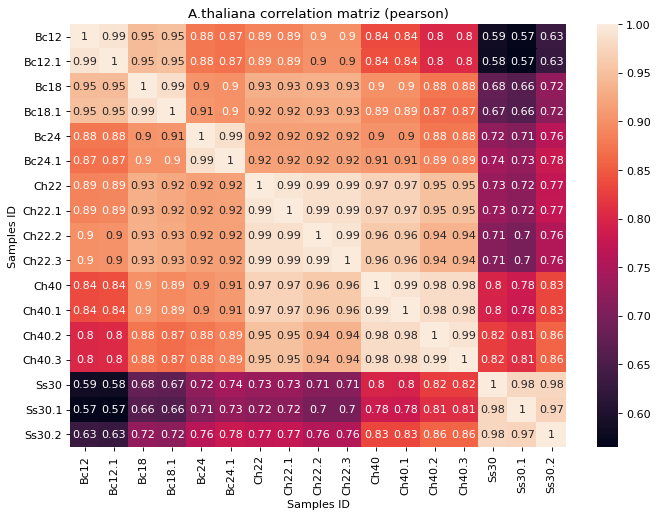

In [90]:
df1 = f_rearrange_cols(df1)
tit = "A.thaliana correlation matriz (pearson)"
df_plot_heatmap_corr(df1, tit)

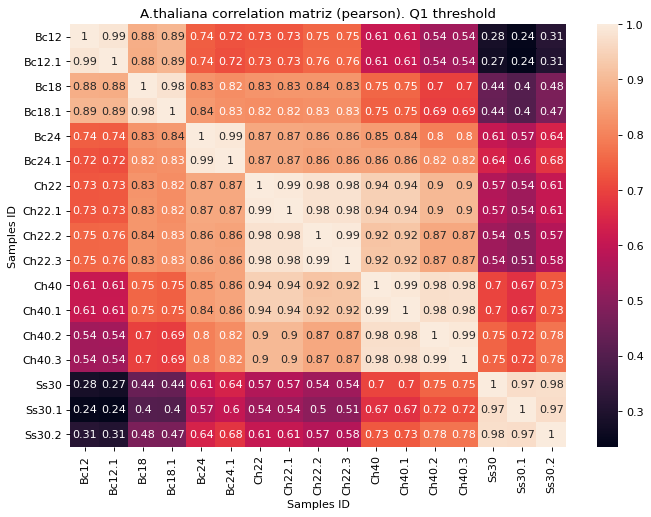

In [91]:
df1 = pd.read_csv('all_infected_Log2_17ceros_Q1_drop.csv', sep='\t')
df1.drop(df1.columns[df1.columns.str.contains('Unnamed',case=False)],axis=1,inplace=True)  
df1.drop("zero-counter",axis=1,inplace=True)
df1 = f_rearrange_cols(df1)
tit = "A.thaliana correlation matriz (pearson). Q1 threshold"
df_plot_heatmap_corr(df1, tit)

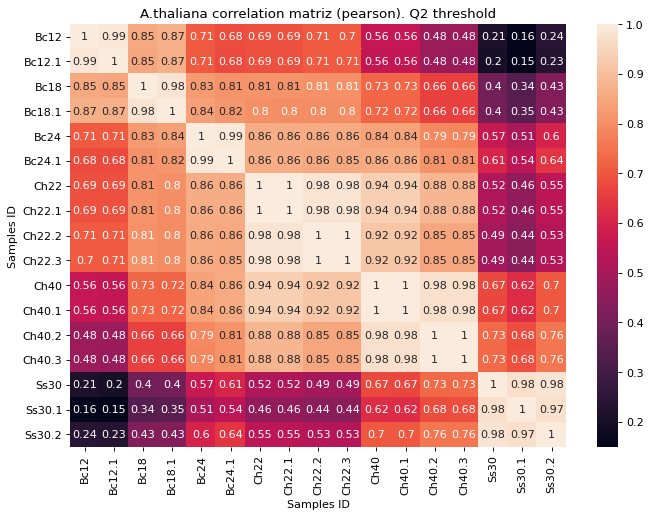

In [92]:
df1 = pd.read_csv('all_infected_Log2_17ceros_Q2_drop.csv', sep='\t')
df1.drop(df1.columns[df1.columns.str.contains('Unnamed',case=False)],axis=1,inplace=True)  
df1.drop("zero-counter",axis=1,inplace=True)
df1 = f_rearrange_cols(df1)
tit = "A.thaliana correlation matriz (pearson). Q2 threshold"
df_plot_heatmap_corr(df1, tit)

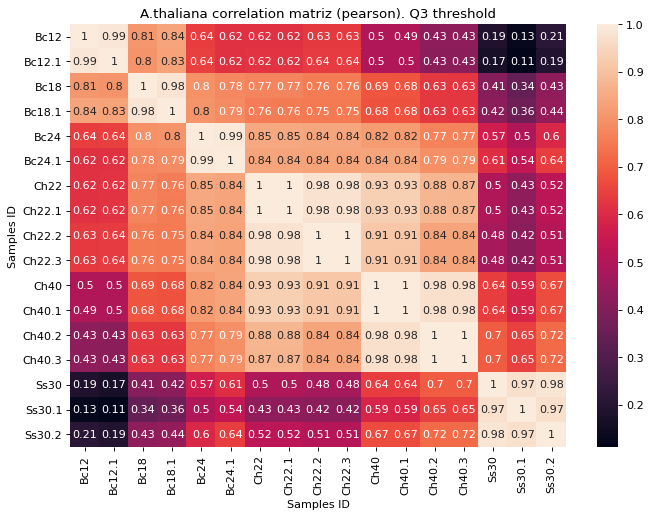

In [93]:
df1 = pd.read_csv('all_infected_Log2_17ceros_Q3_drop.csv', sep='\t')
df1.drop(df1.columns[df1.columns.str.contains('Unnamed',case=False)],axis=1,inplace=True)  
df1.drop("zero-counter",axis=1,inplace=True)
df1 = f_rearrange_cols(df1)
tit = "A.thaliana correlation matriz (pearson). Q3 threshold"
df_tmp = df_plot_heatmap_corr(df1, tit)

In [94]:
#df1.head
df1.drop(['Genes'],axis=1,inplace=True)
df1

,Bc12,Bc12.1,Bc18,Bc18.1,Bc24,Bc24.1,Ch22,Ch22.1,Ch22.2,Ch22.3,Ch40,Ch40.1,Ch40.2,Ch40.3,Ss30,Ss30.1,Ss30.2
0,10.417853,10.658211,10.787086,10.422065,11.240791,11.102632,9.726218,9.640245,9.643856,9.746514,9.074141,9.264443,9.330917,9.197217,8.581201,8.668885,9.501837
1,11.527477,11.903882,8.971544,10.094078,9.481799,9.370687,8.994353,9.047124,10.292322,10.277287,8.675957,8.507795,8.011227,7.918863,11.512247,12.283088,12.009479
2,10.660887,11.009829,11.643856,10.801708,11.418907,11.549303,10.500842,10.548822,10.820977,10.767357,10.348728,10.328675,10.287712,10.277287,9.214319,9.136991,9.513728
3,8.409391,8.321928,8.997179,8.379378,9.533330,9.403012,8.280771,8.467606,8.335390,8.330917,8.562242,8.596190,8.388017,8.558421,7.930737,7.948367,8.022368
4,8.392317,8.499846,8.731319,8.294621,9.651052,9.675957,8.693487,8.636625,8.543032,8.668885,8.982994,9.008429,9.231221,9.266787,8.370687,9.087463,8.807355
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1819,10.070121,10.214319,10.082149,9.652845,11.086800,11.415742,11.224605,11.281930,11.098690,11.068778,10.928518,10.970825,11.233620,11.151017,8.693487,8.228819,9.197217
1820,8.550747,9.623881,9.238405,8.965784,11.516685,11.370687,9.631177,9.684749,9.935165,9.759888,9.411511,9.287712,8.366322,8.257388,9.036174,8.703904,8.312883
1821,10.038919,10.270295,10.379378,9.773139,11.780130,11.904258,10.224002,10.232421,10.231221,10.295769,10.258566,10.252665,10.342075,10.278449,9.853310,9.810572,10.400879
1822,9.479780,9.867279,9.738092,9.169925,10.126704,10.256209,9.328675,9.419960,9.467606,9.276124,9.202124,9.303781,9.131857,9.245553,9.055282,9.192293,9.616549


In [95]:
print("Top Absolute Correlations")
get_top_abs_correlations(df1,10)

Top Absolute Correlations


Ch40.2  Ch40.3    0.998598
Ch22    Ch22.1    0.998470
Ch22.2  Ch22.3    0.998456
Ch40    Ch40.1    0.998325
Bc24    Bc24.1    0.992975
Bc12    Bc12.1    0.988887
Ss30    Ss30.2    0.983526
Bc18    Bc18.1    0.979223
Ch22.1  Ch22.2    0.978451
Ch22    Ch22.2    0.978376
dtype: float64

In [96]:
df1.corr().unstack().sort_values().drop_duplicates()

Bc12.1  Ss30.1    0.111751
Ss30.1  Bc12      0.127519
Ss30    Bc12.1    0.169985
        Bc12      0.186794
Ss30.2  Bc12.1    0.194508
                    ...   
Ch40.1  Ch40      0.998325
Ch22.3  Ch22.2    0.998456
Ch22.1  Ch22      0.998470
Ch40.3  Ch40.2    0.998598
Bc12    Bc12      1.000000
Length: 137, dtype: float64

Text(0.5, 51.0, 'Samples ID')

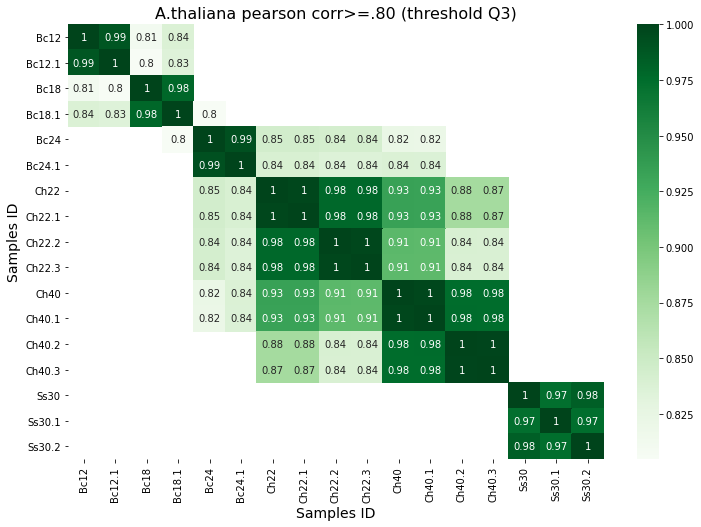

In [98]:
#You can do graphically according to this simple code by substituting your data.
corr = df1.corr()
kot = corr[corr>=.80]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Greens", annot=True)
plt.title("A.thaliana pearson corr>=.80 (threshold Q3)", fontsize=16)
plt.ylabel("Samples ID", fontsize=14)
plt.xlabel("Samples ID",  fontsize=14)

Text(0.5, 51.0, 'Samples ID')

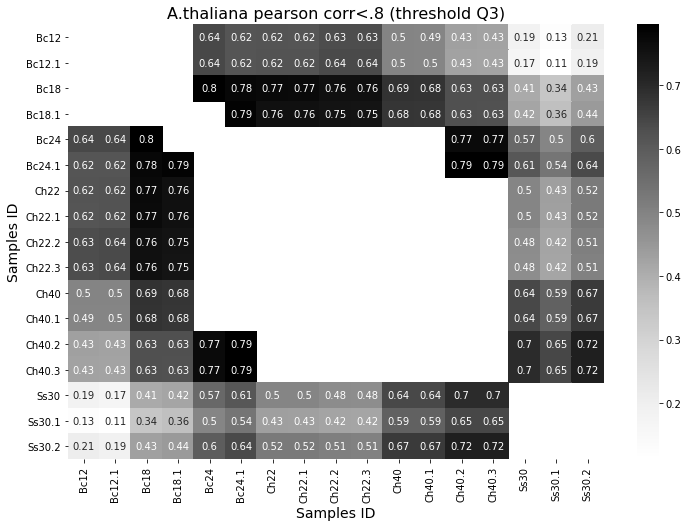

In [101]:
#You can do graphically according to this simple code by substituting your data.
corr = df1.corr()
kot = corr[corr<.8]
plt.figure(figsize=(12,8))
sns.heatmap(kot, cmap="Greys", annot=True)
plt.title("A.thaliana pearson corr<.8 (threshold Q3)", fontsize=16)
plt.ylabel("Samples ID", fontsize=14)
plt.xlabel("Samples ID",  fontsize=14)

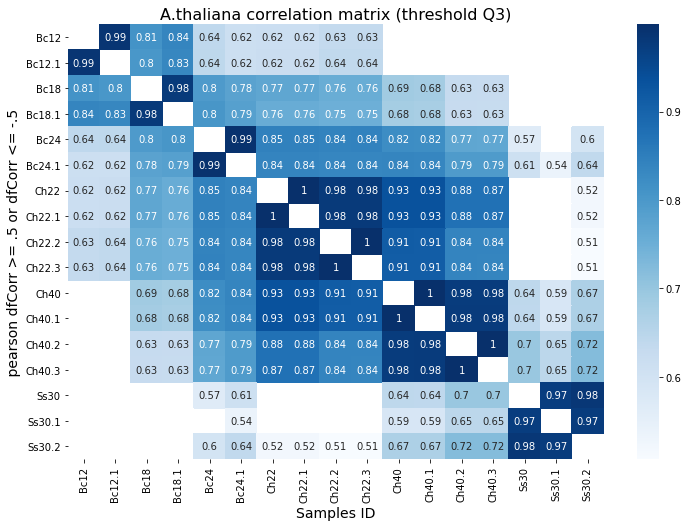

In [81]:
dfCorr = df1.corr()
filteredDf = dfCorr[((dfCorr >= .5) | (dfCorr <= -.5)) & (dfCorr !=1.000)]
plt.figure(figsize=(12,8))
sns.heatmap(filteredDf, annot=True, cmap="Blues")
plt.title("A.thaliana correlation matrix (threshold Q3)", fontsize=16)
plt.ylabel(" pearson dfCorr >= .5 or dfCorr <= -.5 ", fontsize=14)
plt.xlabel("Samples ID",  fontsize=14)
plt.show()